[81.32348116423566, 82.17063999626018, 82.08099750215062, 73.12717315308007, 79.60678775120242, 84.88024128121653, 77.60528976661865, 90.79309625973659, 83.96139806535368, 79.84260327782268, 86.22057235351082, 86.80365295114115, 76.43135499239689, 88.68656343764204, 65.53623927993651, 72.59703765632469, 72.94497012998566, 84.3212403551197, 83.9115040843603, 82.21773013154036, 80.69487826936886, 77.50641152943143, 81.99110172889851, 82.78705614590554, 82.17621905089455]
[66.49840029657867, 74.27379144694412, 75.2922985860903, 75.90534559950959, 76.63794088328625, 76.70591254137454, 77.72477398451052, 78.50949768784682, 80.95351700924668, 81.10564069885615, 81.43678627775813, 81.51347150888554, 82.37830740265542, 82.4925377463261, 83.737537518623, 84.0509704664028, 84.157837909663, 84.29082450760956, 84.4371883865347, 84.55880356365161, 85.86898585795029, 86.15111438491827, 86.29533072932323, 86.83096422239605, 88.15714162517716]
MAX Score for [1, 2, 3, 4, 5] is 76.63794088328625
MAX Sco

<Figure size 432x288 with 0 Axes>

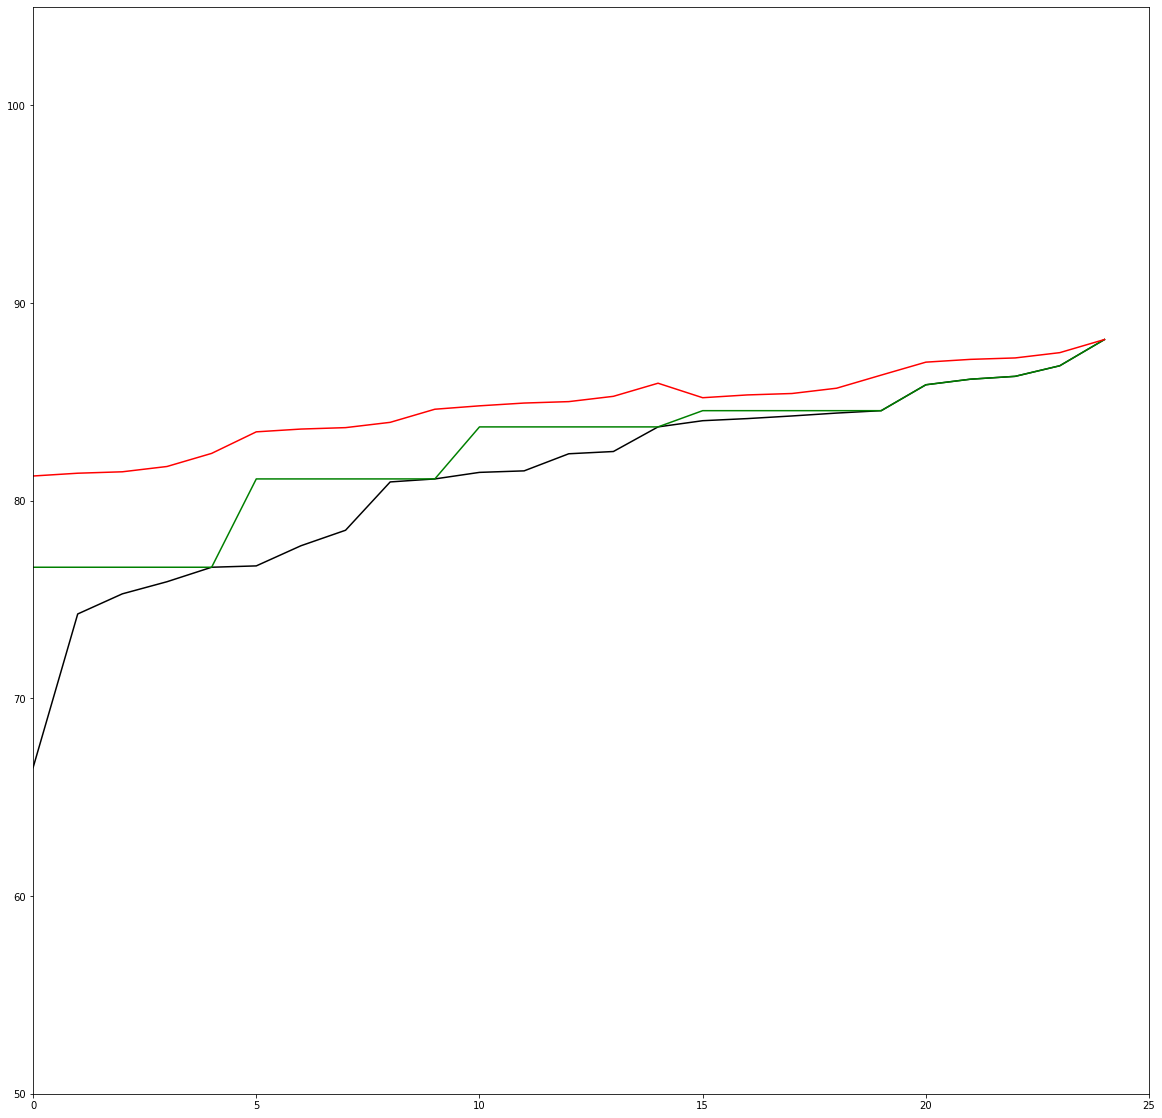

In [128]:
from numpy import arange
import matplotlib.pyplot as plt
import random
import statistics

 
# pools = [
#     [1,2,3,4,5,6,7,8,9], [10,11,12,13,14,15,16,17,18],[19,20,21,22,23,24,25,26,27],
#     [1,10,19,4,13,22,7,16,25],[2,11,20,5,14,23,8,17,26],[3,12,21,6,15,24,9,18,27],
#     [1,2,3,10,11,12,19,20,21],[4,5,6,13,14,15,22,23,24],[7,8,9,16,17,18,25,26,27]]

pools = [[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15], [16,17,18,19,20], [21,22,23,24,25],
         [1,6,11,16,21], [2,7,12,17,22], [3,8,13,18,23], [4,9,14,19,24], [5,10,15,20,25]]


N_students = 25 # 27 for other pools option
average_grade = 80
grade_standard_deviation = 10
individual_student_standard_deviation = 3
cube_side = 3

student_averages = []

for idx in arange(N_students):
    student_averages.append(min(100,random.gauss(average_grade,grade_standard_deviation)))

    
print(student_averages)


student_scores = []
for idx in arange(N_students):
    student_scores.append(min(100,random.gauss(student_averages[idx], individual_student_standard_deviation)))
    
student_scores.sort()

print(student_scores)
pool_scores = []
for pool_index in arange(len(pools)):
    max_pool_score = -1
    for student_number in pools[pool_index]:
        if (student_scores[student_number-1] > max_pool_score):
            max_pool_score = student_scores[student_number-1]

    print('MAX Score for ' + str(pools[pool_index]) + ' is ' + str(max_pool_score))
    pool_scores.append(max_pool_score)

min_pooled_scores = [1000]*N_students
median_pooled_scores = [[] for _ in range(N_students)]

print('------------')
print(median_pooled_scores)
print('------------')
for pool_index in arange(len(pools)):
    pool = pools[pool_index]
    for student_number in pool: #pool
        if (min_pooled_scores[student_number-1] > pool_scores[pool_index]):
            min_pooled_scores[student_number-1] = pool_scores[pool_index]
            
        median_pooled_scores[student_number-1].append(pool_scores[pool_index])
            
print(median_pooled_scores)
print('------------')
median_scores = [0]*N_students
for idx in arange(len(min_pooled_scores)):
    print(str(idx) + ' '  + str(min_pooled_scores[idx]) + ' ' + str(statistics.median(median_pooled_scores[idx])) + ' ' + str(student_scores[idx]))
    median_scores[idx] = statistics.median(median_pooled_scores[idx])
    
    
plt.figure(1)
plt.figure(figsize=(20,20))
plt.plot(student_scores, 'k', label='Individual Scheme')
plt.plot(min_pooled_scores, 'g', label='Minimum Pooled Scheme')
plt.plot(median_scores, 'r', label='Median Pooled Scheme')

plt.ylim(50, 105)
plt.xlim(0, N_students)

plt.savefig('/Users/kootsoop/Pictures/Pooled-Marking-Schemes-N=' + str(len(pools[0])) + '.png')

